In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('machineLearningBasic/datasets/titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#inplace=True 로 원본 데이터 변경. drop 한 거 저 조건 안넣어주면 원본 변경이 안됨
df.drop(['PassengerId','Name','Cabin', 'Ticket'], axis = 1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [11]:
mean_age = df['Age'].mean()
mean_age

29.69911764705882

In [12]:
# 값이 없는 것에 평균 값 넣어주기
df['Age'].fillna(mean_age, inplace=True)

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
df = pd.get_dummies(df) # 컬럼값을 수치화
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [22]:
y = df['Survived']
X = df.drop(['Survived'], axis=1)

In [21]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
5,3,29.699118,0,0,8.4583,0,1,0,1,0
6,1,54.000000,0,0,51.8625,0,1,0,0,1
7,3,2.000000,3,1,21.0750,0,1,0,0,1
8,3,27.000000,0,2,11.1333,1,0,0,0,1
9,2,14.000000,1,0,30.0708,1,0,1,0,0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [41]:
y_pred = clf.predict(X_test)

In [42]:
print("accuracy = {:.2f}".format(accuracy_score(y_test, y_pred)))

accuracy = 0.84


In [43]:
clf.feature_importances_

array([0.12889523, 0.14165162, 0.05706852, 0.00310646, 0.18269822,
       0.36858148, 0.09741717, 0.00497555, 0.0012651 , 0.01434064])

In [44]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [45]:
feature_imp = pd.DataFrame(clf.feature_importances_, X.columns)

In [46]:
feature_imp[0].sort_values(ascending=False) #소팅

Sex_female    0.368581
Fare          0.182698
Age           0.141652
Pclass        0.128895
Sex_male      0.097417
SibSp         0.057069
Embarked_S    0.014341
Embarked_C    0.004976
Parch         0.003106
Embarked_Q    0.001265
Name: 0, dtype: float64

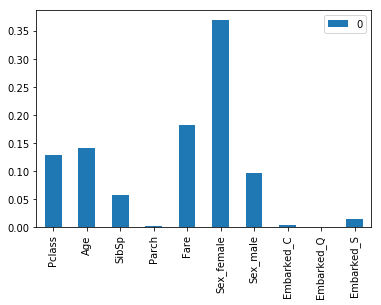

In [47]:
feature_imp.plot(kind='bar')